## Paso 1: Importando librerías

In [199]:
from keras.datasets import mnist
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.utils import to_categorical
from keras.models import Sequential
import matplotlib.pyplot as plt

## Paso 2: Buscar o crear nuestro set de datos

Numero en la imagen es: 0


<function matplotlib.pyplot.show(close=None, block=None)>

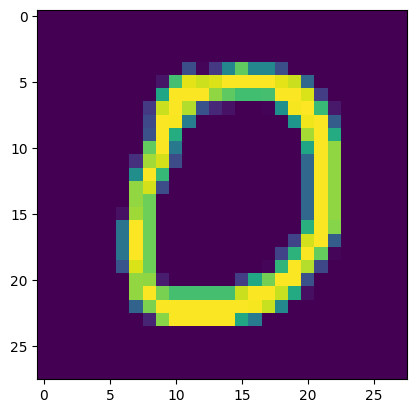

In [200]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(f"Numero en la imagen es: {y_test[10]}")
plt.imshow(x_test[10])
plt.show

## Paso 3: Limpieza o preporocesamiento de datos

In [201]:
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

## Paso 4: Creando un modelo de datos

In [202]:
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

/Users/david/projects/demos-and-test/bootcamp-machine-learning/calculator-number-reconizer/venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [203]:
model.compile(optimizer='adam', loss='categorical_crossentropy',
              metrics=['accuracy'])


# Paso 5: Entrenar el modelo

In [204]:
model.fit(x_train, y_train, validation_data=(
    x_test, y_test), epochs=5, batch_size=32)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9054 - loss: 0.3115 - val_accuracy: 0.9763 - val_loss: 0.0710
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9854 - loss: 0.0475 - val_accuracy: 0.9873 - val_loss: 0.0352
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9922 - loss: 0.0251 - val_accuracy: 0.9905 - val_loss: 0.0336
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9942 - loss: 0.0198 - val_accuracy: 0.9914 - val_loss: 0.0272
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9954 - loss: 0.0144 - val_accuracy: 0.9882 - val_loss: 0.0374


## Paso 6: Evaluando sobre data de test

In [205]:
y_predict = model.predict(x_test)
less, accuracy = model.evaluate(x_test, y_test)
print("Precision: {} / Perdida: {}".format(accuracy, less))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9863 - loss: 0.0410
Precision: 0.9882000088691711 / Perdida: 0.03743623569607735


In [206]:
model.save('../number_reconizer.keras')